----
  # `WeRateDogs` tweet data analysis

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json


---
## Gathering the required datasets

In [2]:
# Importing the twitter archive csv file into a pandas dataframe

twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading the image-predictions file using the requests library. 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
filename = 'image-predictions.tsv'
with open(filename, 'wb') as file:
    file.write(response.content)

In [4]:
# Reading the image-predictions dataset into a pandas dataframe

image_df = pd.read_csv('image-predictions.tsv', '\t')

C:\Users\Williams Praise\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Reading in the tweet_id, retweet_count amd favorite_count data from the tweet_json file into a pandas Dataframe

my_dict = []
with open('tweet-json.json') as file:
    for i in file:
        data = json.loads(i)
    
        my_dict.append({'tweet_id':data['id'], 'retweet_count':data['retweet_count'], 'favorite_count':data['favorite_count']})
        
tweet_stat = pd.DataFrame(my_dict)

---
## Assessing data

In [6]:
# checking through the twitter-archived-enhanced dataset

twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408...,10,10,None,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None
2148,669749430875258880,NaN,NaN,2015-11-26 05:28:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669749430...,8,10,Clarence,None,None,None,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None


In [7]:
twitter_df.shape

(2356, 17)

In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# checking if there are records of retweets in the twitter_df
# retweets will not have their retweet_status_id as null...

twitter_df[twitter_df.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


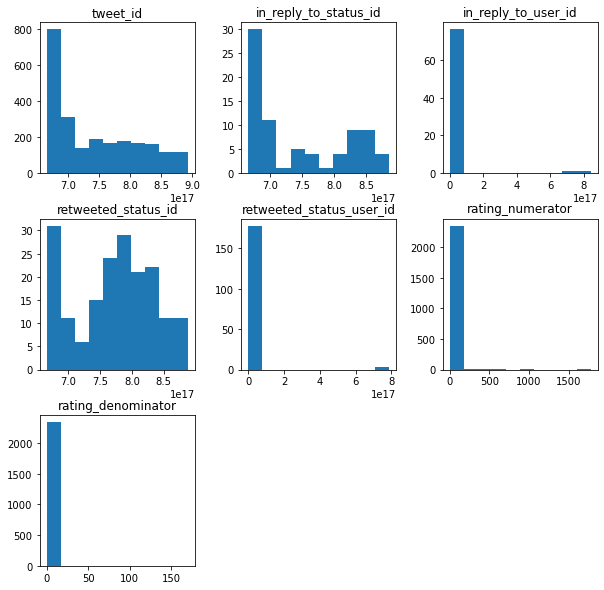

In [11]:
twitter_df.hist(figsize = (10,10), grid = False);

In [12]:
# checking the distribution of names in the twitter_df table

twitter_df.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [13]:
#checking the source column of the twitter_df table

twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_df[twitter_df.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [15]:
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
# checking through the image predictions dataset
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
1807,832397543355072512,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,1,Pekinese,0.988916,True,Brabancon_griffon,0.001677,True,Siamese_cat,0.001126,False
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
553,677573743309385728,https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg,2,patio,0.535070,False,folding_chair,0.080419,False,parallel_bars,0.034796,False
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True


In [17]:
# checking through the image_df table

image_df.shape

(2075, 12)

In [18]:
# checking through the tweet_stat table

tweet_stat.sample(5)

,tweet_id,retweet_count,favorite_count
1990,672614745925664768,644,1302
2265,667524857454854144,1198,1798
2219,668480044826800133,162,491
726,782305867769217024,6470,18630
1988,672640509974827008,348,1032


In [19]:
tweet_stat.shape

(2354, 3)

In [20]:
tweet_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
# checking the tweet_stat table for tweets with favorite count of 0

tweet_stat[tweet_stat.favorite_count == 0]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


## Issues detected

### Quality

- Erroneous datatype for the *timestamp* column in the `twitter_df` table.
- Presence of some irrelevant columns such as *in_reply_to_status_id* and *in_reply_to_user_id* in the `twitter_df` table.
- Records of retweets detected in the `twitter_df` table.
- Unnecessary html tags in *source* column of the `twitter_df` table inplace of the tweet source label.
- Erroneous dog names such as *this*, *the*, *very* in the `twitter_df` table and some labelled as *None*
- Some images in the `image_df` table are not dog images. 
- Some breed predictons are lowercase and some are title case in the `image_df` table.
- some *tweet_ids* present in the `twitter_df` table are missing in the `image_df` table. It's also the same for the `tweet_stat` table.
- Some tweet_ids in the `tweet_stat` table have a favorite_count of 0

### Tidiness

* The columns *doggo*, *floofer*, *pupper* and *puppo* need to be represented as a merged column named ***dog_stage***
* Combine the dog_stage with the cleaned `twitter_df` table and drop unnecessary columns.
* A column for ***breed*** based on the predictions should be added to the cleaned `image_df` table and irrelevant columns removed.
* The cleaned `twitter_df` table rows with images in the cleaned `image_df` should be combined together. 


---

## Cleaning Data

### Quality

In [22]:
# Taking a copy of the twitter_df table upon which the cleaning tasks will be done. 

twitter_clean = twitter_df.copy()

 ***Erroneous datatype for the timestamp column in the `twitter_df` table.***

#### Define

convert the timestamp column in the `twitter_df` table to the datetime datatype.

**Code**

In [23]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

#### Test

In [24]:
twitter_clean.timestamp.dtype

datetime64[ns, UTC]

***Records of retweets detected in the `twitter_df` table***

**Define**

Drop the rows that have their *retweeted_status_id* column as a non-null value. 

**Code**

In [25]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull() == True]

**Test**

In [26]:
twitter_clean[twitter_clean.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


***Unnecessary html tags in source column of the `twitter_df` table inplace of the tweet source label.***

#### Define 

Replace the tags with the tweet source label.

#### Code

In [27]:
old_source = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

new_source = ['Twitter for Iphone', 'Twitter Web Client',
             'Vine', 'TweetDeck']

twitter_clean.source.replace(old_source, new_source, inplace=True)

#### Test

In [28]:
twitter_clean[['source']].sample(5)

,source
2070,Twitter for Iphone
1141,Twitter for Iphone
2095,Twitter for Iphone
1230,Twitter for Iphone
1091,Twitter for Iphone


***Presence of irrelevant columns in the `twitter_df` column***

**Define**

Drop columns with irrelevant data to the analysis

**Code**

In [29]:
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
                   'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [30]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


***Erroneous dog names such as the, this, very in the `twitter_df` table and some labelled as None***

**Define**

Replace the erroneous dog names and those names labelled as *None* with *__No-name__* to indicate that such dogs don't have names.

**Code**

In [31]:
wrong_names = []
for i in twitter_clean.name:
    if i.islower():
        wrong_names.append(i)
    
twitter_clean.name = twitter_clean.name.replace(wrong_names + ['None'], 'No-name')    

**Test**

In [32]:
twitter_clean.name.value_counts().sort_values()

Trigger         1
Mauve           1
Chef            1
Sobe            1
Longfellow      1
             ... 
Oliver         10
Cooper         10
Charlie        11
Lucy           11
No-name       784
Name: name, Length: 931, dtype: int64

***Some images in the `image_df` table are not dog images***

**Define**

Drop all images that are not dog images

#### Code

In [33]:
# create a copy of the image_df table upon which the cleaning tasks will be done

image_clean = image_df.copy()

# segment the table to reveal the images that are not dog images
not_dog_images = image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

# drop the rows with the false dog images using the index of the not_dog_images table
image_clean.drop(not_dog_images.index, inplace=True)

#### Test

In [34]:
image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


***Some breed predictons are lowercase and some are title case in the `image_df` table.***

#### Define 

Convert all breed prediction columns to title case in the cleaned image table


#### Code

In [35]:
image_clean.p1 = image_clean.p1.str.title()

image_clean.p2 = image_clean.p2.str.title()

image_clean.p3 = image_clean.p3.str.title()

#### Test

In [36]:
image_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman


***Some tweet_ids in the `tweet_stat` table have a favorite_count of 0***

#### Define

It's quite unlikely and must be some error from the API. Nonetheless, drop
rows where favorite_count is zero toretain only accurate data.

#### Code

In [37]:
# creating a copy of the tweet_stat table upon which the cleaning task will be done

tweet_stat_clean = tweet_stat.copy()

# segmenting the tweets with favorite count of 0
empty_favs = tweet_stat_clean[tweet_stat_clean.favorite_count == 0]

#dropping the rows with favorite count of 0

tweet_stat_clean.drop(empty_favs.index, inplace=True)

#### Test


In [38]:
tweet_stat_clean.query('favorite_count == 0')

,tweet_id,retweet_count,favorite_count


### Tidiness

***The columns doggo, floofer, pupper and puppo need to be represented as a merged column named dog_stage***

#### Define

The `pd.melt()` method is used to convert the columns to rows and a new column is added as *dog_stage*

#### Code

In [39]:
dog_stage_df = pd.melt(twitter_clean, id_vars='tweet_id',value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='dog_stage')
dog_stage_df

,tweet_id,variable,dog_stage
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None
...,...,...,...
8695,666049248165822465,puppo,None
8696,666044226329800704,puppo,None
8697,666033412701032449,puppo,None
8698,666029285002620928,puppo,None


In [40]:
#drop the variable column

dog_stage_df.drop('variable', axis=1, inplace=True)

In [41]:
# this proves the presence of duplicates in the table
dog_stage_df.query('tweet_id == 666044226329800704 ')

,tweet_id,dog_stage
2171,666044226329800704,None
4346,666044226329800704,None
6521,666044226329800704,None
8696,666044226329800704,None


In [42]:
# the duplicate values are dropped

dog_stage_df.drop_duplicates(inplace=True)

In [43]:
# the None values are replaced with np.NaN to ensure pandas can read the null values

dog_stage_df.replace('None', np.NaN, inplace=True)

In [44]:
dog_stage_df.isnull().sum()

tweet_id        0
dog_stage    2175
dtype: int64

In [45]:
dog_stage_df.shape

(2531, 2)

In [46]:
twitter_clean.shape

(2175, 11)

Comparing the `dog_stage_df` with the original table `twitter_clean`, it is noticed that some tweets have more than one dog stage.

In [47]:
has_dog_stage = dog_stage_df[dog_stage_df.dog_stage.notna()]

In [48]:
has_more_dog_stage = has_dog_stage[has_dog_stage.duplicated(subset='tweet_id', keep=False)].sort_values('tweet_id')

In [49]:
# the tweets with more than one dog stage are joined with a comma

combined_dog_stage = has_more_dog_stage.groupby('tweet_id').transform(lambda x: ', '.join(x))
combined_dog_stage.head()

,dog_stage
935,"doggo, pupper"
5285,"doggo, pupper"
885,"doggo, pupper"
5235,"doggo, pupper"
781,"doggo, pupper"


In [50]:
# the combined dog stage is replaced in the dog_stage table

dog_stage_df.loc[combined_dog_stage.index, 'dog_stage'] = combined_dog_stage.values

In [51]:
dog_stage_df.dog_stage.unique()

array([nan, 'doggo', 'doggo, puppo', 'doggo, floofer', 'pupper, doggo',
       'doggo, pupper', 'floofer', 'pupper', 'puppo'], dtype=object)

In [52]:
# the dog_stage values are sorted to push the null values to the bottom

dog_stage_df.sort_values('dog_stage', inplace=True)

In [53]:
# all duplicates are then removed

dog_stage_df.drop_duplicates('tweet_id', inplace=True)

#### Test

In [54]:
dog_stage_df.head()

,tweet_id,dog_stage
9,890240255349198849,doggo
730,758828659922702336,doggo
715,760521673607086080,doggo
711,760893934457552897,doggo
694,763956972077010945,doggo


***Combine the dog_stage with the cleaned `twitter_df` table and drop unnecessary columns***

#### Define

Using the `pd.merge()` method, combine the dog_stage melted dataframe with the cleaned `twitter_df` table; then using the `df.drop()` method, drop unnecessary columns.

#### Code

In [55]:
# combining the dog_stage with the cleaned twitter_df table

twitter_clean = pd.merge(left=twitter_clean, right=dog_stage_df, how='left', on='tweet_id')

# dropping unnecessary columns

twitter_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

#### Test

In [56]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 152.9+ KB


***A column for breed based on the predictions should be added to the `image_df` table and irrelevant columns removed***

**Define**

Assign a dog breed for each _tweet_id_ based on the image predictions and remove irrelevant columns.

**Code**

In [57]:
breed = []

for i in list(image_clean.index):
    if image_clean.p1_dog[i] == True:
        breed.append(image_clean.p1[i])
    elif image_clean.p2_dog[i] == True:
        breed.append(image_clean.p2[i])
    else:
        breed.append(image_clean.p3[i])
        
image_clean['breed'] = breed

In [58]:
# irrelevant columns are removed after the breed column is added.

image_clean.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
                  'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

#### Test

In [59]:
image_clean.head()

,tweet_id,breed
0,666020888022790149,Welsh_Springer_Spaniel
1,666029285002620928,Redbone
2,666033412701032449,German_Shepherd
3,666044226329800704,Rhodesian_Ridgeback
4,666049248165822465,Miniature_Pinscher


***The cleaned `twitter_df` table rows with images in the cleaned `image_df` should be combined together***

#### Define 

Select only the tweet_ids with images in the cleaned `image_df` table and combine them with the cleaned `image_df` table.

#### Code

In [60]:
# selecting only the tweet_ids with images in the image_clean table.

twitter_clean = twitter_clean[twitter_clean.tweet_id.isin(image_clean.tweet_id)]

twitter_clean.shape

(1686, 8)

In [61]:
# combining the twitter_clean table (that has images) with the image_clean table

twitter_combine = pd.merge(left=twitter_clean, right=image_clean, how='left', on='tweet_id')


#### Test

In [62]:
twitter_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   int64              
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   dog_stage           260 non-null    object             
 8   breed               1686 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 131.7+ KB


In [63]:
# merging all the cleaned pieces of data together.

master_df = pd.merge(left=twitter_combine, right=tweet_stat_clean, how='left', on = 'tweet_id')
master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Labrador_Retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,Basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for Iphone,Here we have a majestic great white breaching ...,13,10,No-name,NaN,Chesapeake_Bay_Retriever,3261,20562


---
## Storing Data



In [64]:
# storing the cleaned master dataframe in a csv file

master_df.to_csv('twitter_archive_master.csv',index=False)

---
## Analyzing and visualising Data


In [65]:
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')

twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Labrador_Retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,Basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for Iphone,Here we have a majestic great white breaching ...,13,10,No-name,NaN,Chesapeake_Bay_Retriever,3261,20562


### Breed statistics

In [66]:
breed_counts = twitter_archive_master_df.groupby(['breed']).count()
breed_sums = twitter_archive_master_df.groupby(['breed']).sum()
breed_stats = twitter_archive_master_df.groupby(['breed']).mean().round()[['retweet_count', 'favorite_count']]
breed_stats['tweet_counts'] = breed_counts['tweet_id']
breed_stats['total_favorite_count'] = breed_sums['favorite_count']
breed_stats['total_retweet_count'] = breed_sums['retweet_count']
breed_stats = breed_stats.reset_index()
breed_stats.rename({'retweet_count':'mean_retweet_count', 'favorite_count':'mean_favorite_count'}, axis = 1, inplace=True)
breed_stats = breed_stats.astype({'mean_retweet_count':'int64', 'mean_favorite_count':'int64',
                                    'total_favorite_count':'int64', 'total_retweet_count':'int64'})
breed_stats = breed_stats[['breed', 'tweet_counts', 'total_retweet_count', 'total_favorite_count', 
                           'mean_retweet_count', 'mean_favorite_count']]
breed_stats.head(10)

,breed,tweet_counts,total_retweet_count,total_favorite_count,mean_retweet_count,mean_favorite_count
0,Afghan_Hound,3,17928,51980,5976,17327
1,Airedale,12,16725,63370,1394,5281
2,American_Staffordshire_Terrier,16,36973,150083,2311,9380
3,Appenzeller,2,2916,14635,1458,7318
4,Australian_Terrier,2,6157,22255,3078,11128
5,Basenji,9,8011,22534,890,2504
6,Basset,17,49563,199955,2915,11762
7,Beagle,20,27050,88159,1352,4408
8,Bedlington_Terrier,6,45061,126919,7510,21153
9,Bernese_Mountain_Dog,11,17782,80124,1617,7284


#### Which dog breed was the most popular on WerateDogs Twitter?

The top 10 most popular dog breeds.
 The most popular dog breed is the Golden_Retriever


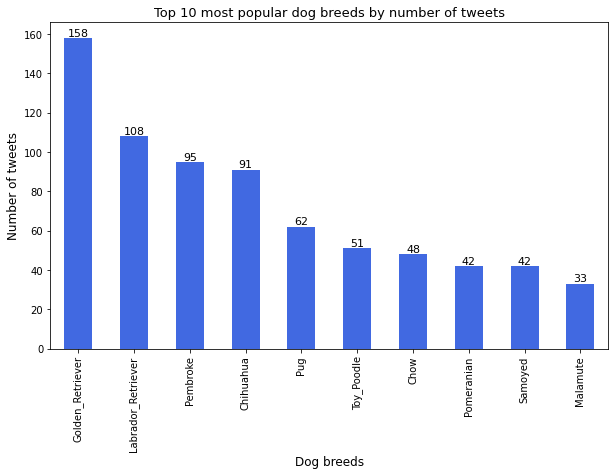

In [76]:
print('The top 10 most popular dog breeds.\n The most popular dog breed is the Golden_Retriever')
popular10_breed = breed_stats.sort_values(by = 'tweet_counts', ascending=False).head(10)

# creating a function for plotting figures

def plot_figure(df, x, y, plot_type, xlabel, ylabel, title, figsize, legend, color):
    ax = df.plot(x = x, y = y, kind = plot_type, figsize = figsize, legend = legend, color = color)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_title(title, fontsize = 13)
    ax.bar_label(ax.containers[0], fontsize = 11)
    
# calling the plot_figure function to plot a bar chart of the 10 most popular breeds

plot_figure(df = popular10_breed,x = 'breed', y = 'tweet_counts',
           plot_type='bar', xlabel='Dog breeds',
            ylabel= 'Number of tweets',
           title='Top 10 most popular dog breeds by number of tweets', figsize = (10,6),
           legend = None, color = 'royalblue')

#### What is the most favorited tweet up to the date the tweets were gathered?

In [68]:
# what is the most favorited tweet up to the date all the tweets were gathered

twitter_archive_master_df.sort_values('favorite_count', ascending=False).head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,retweet_count,favorite_count
278,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for Iphone,Here's a super supportive puppo participating ...,13,10,No-name,puppo,Lakeland_Terrier,48265,132810
691,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for Iphone,Here's a doggo realizing you can stand in a po...,13,10,No-name,doggo,Labrador_Retriever,79515,131075
53,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for Iphone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,English_Springer,45849,107956
363,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for Iphone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,Chihuahua,56625,107015
100,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for Iphone,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,French_Bulldog,32883,106827


#### Which dog breed had the highest retweet count per tweet

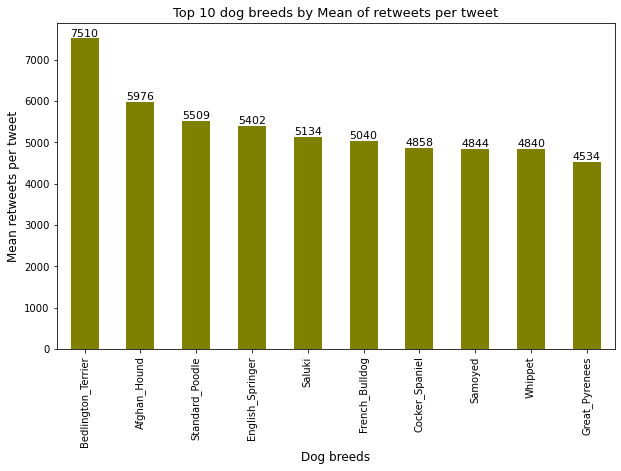

In [69]:
retweets_per_tweet10 = breed_stats.sort_values(by = 'mean_retweet_count', ascending=False).head(10)
plot_figure(df = retweets_per_tweet10, x = 'breed', y = 'mean_retweet_count', 
            plot_type='bar',legend=None, xlabel='Dog breeds',title= 'Top 10 dog breeds by Mean of retweets per tweet',
            ylabel = 'Mean retweets per tweet',
           figsize=(10,6), color = 'olive')

**Which dog breed has the highest likes per tweet?**

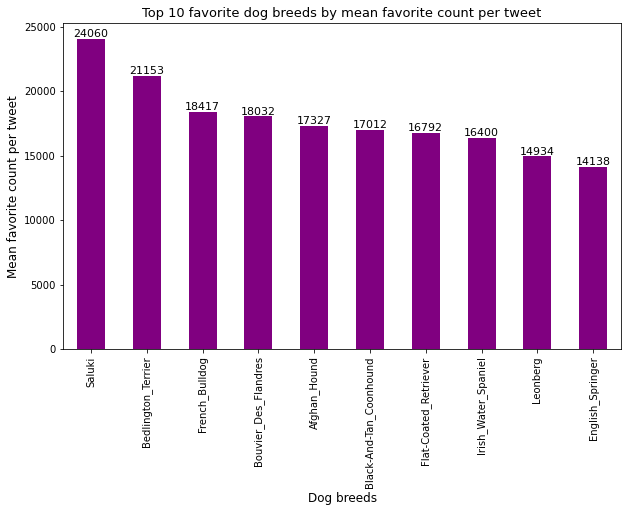

In [70]:
most_favorited10 = breed_stats.sort_values(by = 'mean_favorite_count', ascending=False).head(10)
plot_figure(df = most_favorited10, x = 'breed', y = 'mean_favorite_count', plot_type='bar',
           xlabel='Dog breeds', ylabel='Mean favorite count per tweet',
           title='Top 10 favorite dog breeds by mean favorite count per tweet',
           figsize=(10,6), color='purple', legend = None)

#### Which dog stage was the most common?

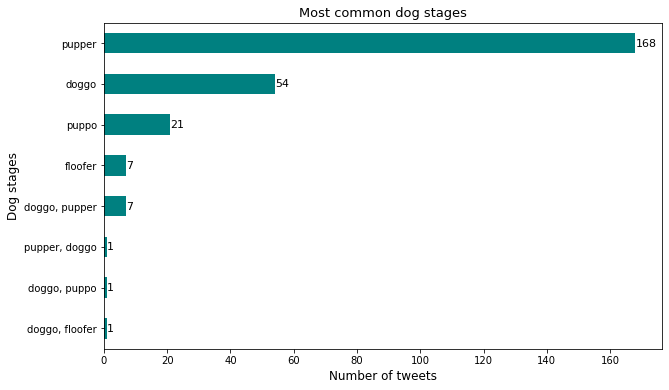

In [71]:
stage_df = twitter_archive_master_df[twitter_archive_master_df.dog_stage.notna()]
dog_stage_grouped = stage_df.groupby('dog_stage').count().sort_values(by = 'tweet_id')
dog_stage_grouped = dog_stage_grouped.reset_index()

plot_figure(df = dog_stage_grouped, x = 'dog_stage', y= 'tweet_id', xlabel='Number of tweets',
           ylabel='Dog stages', plot_type = 'barh', title='Most common dog stages',
           legend=None, figsize = (10,6), color='teal')

### Insights

* The most popular dog breed was the **Golden retriever** with a total of 158 tweets.
* The most retweeted breed was the **Bedlington_Terrier** with a mean of 7510 retweets.
* The most favorited breed was the **Saluki** breed with a mean of 24060 favorite counts.
* The most common dog stage was the **Pupper** stage with a total of 168 tweets.